## Atividade N1 - Inteligência Artificial 2025.1

## Nome:

## RA:

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

O setor de qualidade de uma empresa fabricante de componentes eletrônicos contratou um engenheiro de computação para implantar um sistema automático de estimativa de valores de resistores. O processo de testes é baseado na Lei de Ohm, utilizando-se a equação $$V = RI,$$ em que $V$ é a tensão em (V) **aplicada** ao resistor, $I$ em (A) é a corrente elétrica **medida** e $R$ em (Ω) é o valor do resistor estimado pelo sistema que será desenvolvido pelo engenheiro de computação. A Figura 1 ilustra o processo de testes.

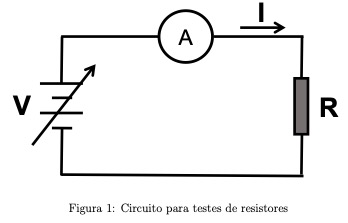

A Tabela 1 mostra as medições obtidas nos testes do resistor.

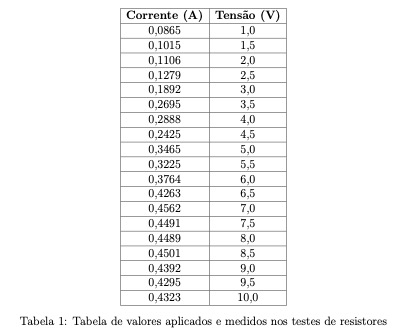

### Base de Dados:

In [3]:
#corrente
I = [0.0865,0.1015,0.1106,0.1279,0.1892,0.2695,0.2888,0.2425,0.3465,0.3225,0.3764,0.4263,0.4562,0.4491,0.4489,
     0.4501,0.4392,0.4295,0.4323]

#tensao
V = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0] 

Diante das informações fornecidas pela empresa, o engenheiro de computação deve desenvolver uma solução utilizando, obrigatoriamente, **regressão linear aplicada com machine learning**, que, a partir das informações obtidas na Tabela 1, estime o valor do resistor $R$ em (Ω). 

A solução desenvolvida deve conter:

**(5,0 pontos) o algoritmo de machine learning, que implementa e informa o valor de $R$;**

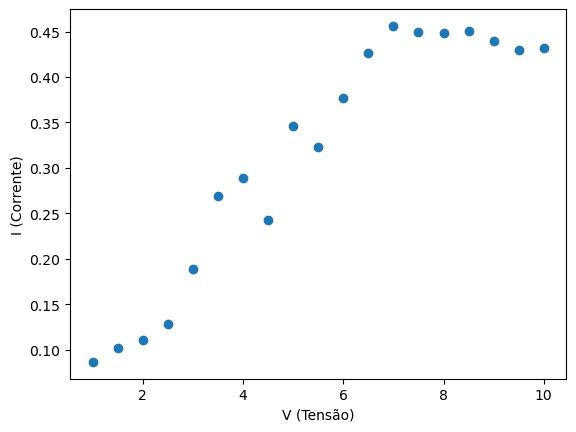

In [4]:
plt.scatter(V,I)

plt.ylabel('I (Corrente)')

plt.xlabel('V (Tensão)')

plt.show()

Custo em 2799 iterações =  0.04069477782820451
w1 = 0.04521191989071886 w0 = 0.06678555068904556


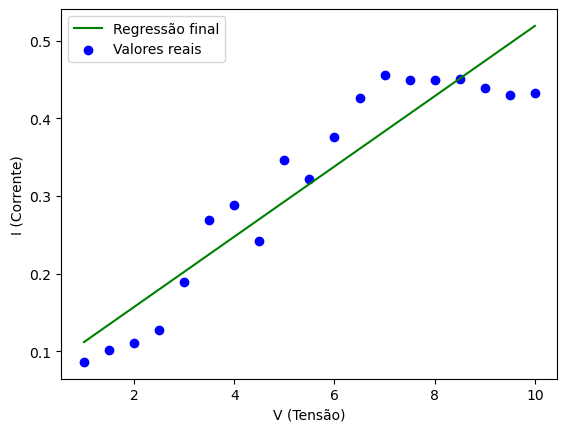

In [5]:
#Parâmetros inicais
w1 = 0.1
w0 = 0.7 #intercept
alpha = 0.001
iteracoes = 2800
costs = []

#Loop de iteracoes para o gradiente convergir para o valor minimo
for i in range(iteracoes):

#Função Custo
    I_pred = np.multiply(w1, V) + w0 #y_chapeu
    Loss_error = (I_pred - I)**2 #Erro de cada linha da base
    cost = np.sum(Loss_error) #funcao Custo
    
#Gradiente
    dw0 = np.sum((I_pred - I))
    dw1 = np.dot((I_pred - I), V)
    costs.append(cost)
    w1 = w1 - alpha*dw1
    w0 = w0 - alpha*dw0
    
    if i == (iteracoes-1):
        
        print("Custo em", i,"iterações = ", cost)
        print("w1 =", w1, "w0 =", w0)
        fig, ax = plt.subplots()
        plt.ylabel('I (Corrente)')
        plt.xlabel('V (Tensão)')
        ax.plot(V, np.multiply(w1, V) + w0, 'g-', label = 'Regressão final')
        ax.scatter(V, I, color='blue', label = 'Valores reais')
        ax.legend(loc = 'best')
        plt.show()

In [6]:
print('R_scratch = ', round(1/w1,3), '(Ohm)')

R_scratch =  22.118 (Ohm)


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
X_sk = np.array(V)

Y_sk = np.array(I)

Y_sk.shape

(19,)

In [9]:
lm = LinearRegression()

lm.fit(X_sk.reshape(-1,1),Y_sk)

LinearRegression()

In [10]:
print('R_sklearn = ', round(float(1/lm.coef_),3), '(Ohm)')

R_sklearn =  22.117 (Ohm)


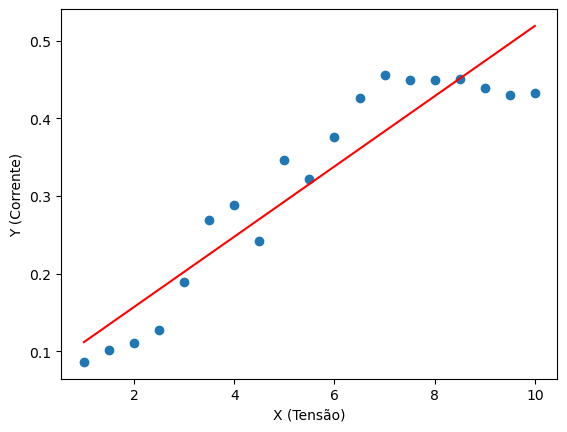

In [11]:
predictions = lm.predict(X_sk.reshape(-1,1))

plt.plot(X_sk, predictions, 'red')

plt.scatter(X_sk,Y_sk)

plt.ylabel('Y (Corrente)')

plt.xlabel('X (Tensão)')

plt.show()

**(1,0 ponto) o valor do parâmetro de tolerância do resistor $R$, justificando sua resposta.**

In [12]:
import math
from sklearn.metrics import mean_squared_error

In [13]:
RMSE = round(math.sqrt((mean_squared_error(X_sk/Y_sk,list(1/lm.coef_)*len(Y_sk)))),3)

Tol = (RMSE * w1)

print('RMSE (R) = ', RMSE, '(Ohm)')

print("")

print('Tolerância = ', round(Tol*100, 2), '%')

RMSE (R) =  5.936 (Ohm)

Tolerância =  26.84 %


In [14]:
print('O valor do resistor com sua tolerância seria apresentado como R = ', round(float(1/lm.coef_),3), '(Ohm)', '+/-', 
      round(Tol*100, 2),'%')

O valor do resistor com sua tolerância seria apresentado como R =  22.117 (Ohm) +/- 26.84 %


Sendo a regressão linear a solução de machine learning mais indicada para estimar o valor de $R$,

**(1,0 ponto) o coeficiente da regressão linear chamado de intercept deve ser considerado na execução do algoritmo? Justifique sua resposta;**

In [15]:
print(round(lm.intercept_, 1))

0.1


**(1,0 ponto) qual é a precisão aproximada para utilizar-se o menor número de iterações na execução da aplicação, tendo como base o custo ou erro obtido em cada iteração? Justifique sua resposta.**

$10^{-4}$, pois deve seguir a precisão da tabela de medição da corrente $I$

Analisando o problema e a solução desenvolvida, considerando os aspectos da engenharia e da física envolvidos, descreva e justifique

**(2,0 pontos) uma recomendação de melhoria no processo da empresa.**

In [16]:
X_rec = X_sk[:-6]

Y_rec = Y_sk[:-6]

X_rec

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ])

In [17]:
lm_rec = LinearRegression()

lm_rec.fit(X_rec.reshape(-1,1),Y_rec)

LinearRegression()

R_rec =  15.753 (Ohm)


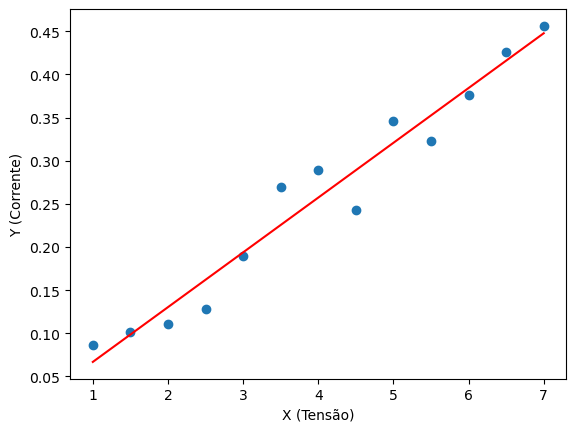

In [18]:
print('R_rec = ', round(float(1/lm_rec.coef_),3), '(Ohm)')

predictions_rec = lm_rec.predict(X_rec.reshape(-1,1))

plt.plot(X_rec, predictions_rec, 'red')

plt.scatter(X_rec,Y_rec)

plt.ylabel('Y (Corrente)')

plt.xlabel('X (Tensão)')

plt.show()

In [19]:
RMSE_rec = np.array((math.sqrt((mean_squared_error(X_rec/Y_rec, list(1/lm_rec.coef_)*len(Y_rec)))),3))

Tol_rec = (RMSE_rec[0] * lm_rec.coef_[0])

print('RMSE_rec (R) = ', round(RMSE_rec[0], 2), '(Ohm)')

print("")

print('Tolerância = ', round(Tol_rec*100, 2), '%')

RMSE_rec (R) =  2.17 (Ohm)

Tolerância =  13.79 %


In [20]:
print('O valor do resistor com sua tolerância seria apresentado como R = ', round(float(1/lm_rec.coef_),3), '(Ohm)', '+/-', 
      round(Tol_rec*100, 2),'%')

O valor do resistor com sua tolerância seria apresentado como R =  15.753 (Ohm) +/- 13.79 %


In [21]:
print(round(lm_rec.intercept_, 1))

0.0
